### How does SVM work?
The basic principle behind the working of Support vector machines is simple – Create a hyperplane that separates the dataset into classes. Let us start with a sample problem. Suppose that for a given dataset, you have to classify red triangles from blue circles. Your goal is to create a line that classifies the data into two classes

According to SVM, we have to find the points that lie closest to both the classes. These points are known as support vectors. In the next step, we find the proximity between our dividing plane and the support vectors. The distance between the points and the dividing line is known as margin. The aim of an SVM algorithm is to maximize this very margin. When the margin reaches its maximum, the hyperplane becomes the optimal one.

The SVM model tries to enlarge the distance between the two classes by creating a well-defined decision boundary. In the above case, our hyperplane divided the data. While our data was in 2 dimensions, the hyperplane was of 1 dimension. For higher dimensions, say, an n-dimensional Euclidean Space, we have an n-1 dimensional subset that divides the space into two disconnected components.

### Advantages of SVM

- Guaranteed Optimality: Owing to the nature of Convex Optimization, the solution will always be global minimum not a local minimum.
- Abundance of Implementations: We can access it conveniently, be it from Python or Matlab.
- SVM can be used for linearly separable as well as non-linearly separable data. Linearly separable data is the hard margin whereas non-linearly separable data poses a soft margin.
- SVMs provide compliance to the semi-supervised learning models. It can be used in areas where the data is labeled as well as unlabeled. It only requires a condition to the minimization problem which is known as the Transductive SVM.
- Feature Mapping used to be quite a load on the computational complexity of the overall training performance of the model. However, with the help of Kernel Trick, SVM can carry out the feature mapping using simple dot product.

### Disadvantages of SVM

- SVM is incapable of handling text structures. This leads to loss of sequential information and thereby, leading to worse performance.
- Vanilla SVM cannot return the probabilistic confidence value that is similar to logistic regression. This does not provide much explanation as confidence of prediction is important in several applications.
- Choice of the kernel is perhaps the biggest limitation of the support vector machine. Considering so many kernels present, it becomes difficult to choose the right one for the data.

### Tune SVM

#### Kernel
Kernel in the SVM is responsible for transforming the input data into the required format. Some of the kernels used in SVM are linear, polynomial and radial basis function (RBF). For creating a non-linear hyperplane, we use RBF and Polynomial function. For complex applications, one should use more advanced kernels to separate classes that are nonlinear in nature. With this transformation, one can obtain accurate classifiers.

#### Regularization
We can maintain regularization by adjusting it in the Scikit-learn’s C parameters. C denotes a penalty parameter representing an error or any form of misclassification. With this misclassification, one can understand how much of the error is actually bearable. Through this, you can nullify the compensation between the misclassified term and the decision boundary. With a smaller C value, we obtain hyperplane of small margin and with a larger C value, we obtain hyperplane of larger value.

#### Gamma
With a lower value of Gamma will create a loose fit of the training dataset. On the contrary, a high value of gamma will allow the model to get fit more appropriately. A low value of gamma only provides consideration to the nearby points for the calculation of a separate plane whereas the high value of gamma will consider all the data-points to calculate the final separation line.

- Review soon

In [1]:
import pandas as pd
import numpy as np            
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data
[Link](https://data-flair.training/blogs/svm-support-vector-machine-tutorial/)

In [2]:
pylab.rcParams['figure.figsize'] = (10, 6)
iris_data = datasets.load_iris()

# We'll use the petal length and width only for this analysis
X = iris_data.data[:, [2, 3]]
y = iris_data.target

# Input the iris data into the pandas dataframe
iris_dataframe = pd.DataFrame(iris_data.data[:, [2, 3]],
                  columns=iris_data.feature_names[2:])

# View the first 5 rows of the data
print(iris_dataframe.head())

# Print the unique labels of the dataset
print('\n' + 'Unique Labels contained in this data are ' + str(np.unique(y)))

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

Unique Labels contained in this data are [0 1 2]


### Split

In [3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    print('The training set contains {} samples and the test set contains {} samples'.format(X_train.shape[0], X_test.shape[0]))

The training set contains 105 samples and the test set contains 45 samples


### Visualizing

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


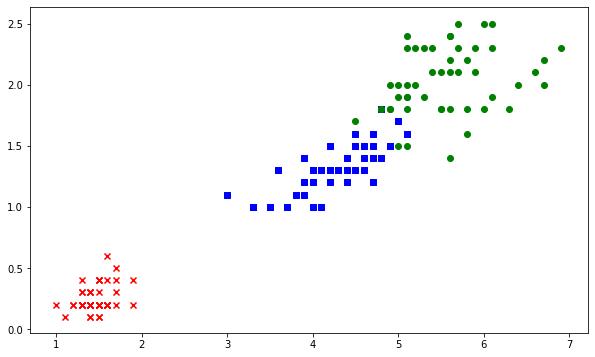

In [4]:
markers = ('x', 's', 'o')
colors = ('red', 'blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
           c=cmap(idx), marker=markers[idx], label=cl)

### Scaling

In [7]:
# Standard scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

print('The first five rows after standardization look like this:\n')
print(pd.DataFrame(X_train_standard, columns=iris_dataframe.columns).head())

The first five rows after standardization look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


### Support vector machine

In [8]:
SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SVM.fit(X_train_standard, y_train)

print('Accuracy of our SVM model on the training data is {:.2f} out of 1'.format(SVM.score(X_train_standard, y_train)))
print('Accuracy of our SVM model on the test data is {:.2f} out of 1'.format(SVM.score(X_test_standard, y_test)))

Accuracy of our SVM model on the training data is 0.95 out of 1
Accuracy of our SVM model on the test data is 0.98 out of 1


### Visualize SVM Model

In [9]:
import warnings
def versiontuple(version):
    return tuple(map(int, (version.split("."))))

def decision_plot(X, y, classifier, test_idx=None, resolution=0.02):
    
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1min, x1max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2min, x2max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution),
                  np.arange(x2min, x2max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


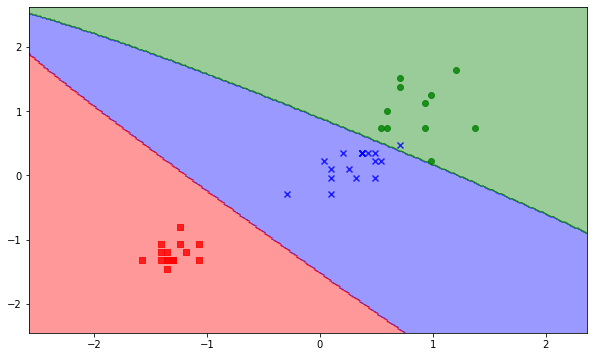

In [10]:
decision_plot(X_test_standard, y_test, SVM)

---

### Support Vector Machines (SVM) - [Link](https://scikit-learn.org/stable/modules/svm.html)

Documentation Notes

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

scikit-learn & numpy

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

**Example**

Imagine sitting on a bed and you want to identify your entire body shape only, you got two options:
1. Place a flat surface big enough to cover the bed on top of your head
2. Place a blanket to cover the entire bed over your head

The entire space is from your bed ground up to the ceiling in a rectangle/square shape. By placing the flat surface on your head in option 1, you created a hyperplane (separator) between you (the object) we want to classify and the empty space above including the extra space all around you that has not been covered due to the flat board's shape.

Now, by placing a blanket in option 2, you have created a new separator that shapes the entire body space and removing all the extra space around you that it does not capture.

Which option would be more accurate in representation the classification of your body with minimal error (no extra space)? I would think option 2 would be best. You have just designed a type of SVM hyperplane, although it might overfit if it's just me if we are going to use it on another person.

**MLM Notes - [Link](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)**

The Maximal-Margin Classifier is a hypothetical classifier that best explains how SVM works in practice.

The numeric input variables (x) in your data (the columns) form an n-dimensional space. For example, if you had two input variables, this would form a two-dimensional space.

A hyperplane is a line that splits the input variable space. In SVM, a hyperplane is selected to best separate the points in the input variable space by their class (0 or 1). In 2D you can visualize this as a line. Formula below:

    B0 + (B1 * X1) + (B2 * X2) = 0

The coefficients (B1 and B2) determine the slope of the line and the intercept (B0) is found by the learning algorithm and X1 and X2 are input variables.

The distance between the line and the closest data points is referred to as **the margin**. The best or optimal line that can separate the two classes is the line that has the largest margin. This is called the **Maximal-Margin Hyperplane**.

What are support vectors?

The support vector machine searches for the closest points, which it calls the "support vectors" (the name "support vector machine" is due to the fact that points are like vectors and that the best line "depends on" or is "supported by" the closest points). In other words, they are data points that lie closest to the decision surface (hyperplane). 